In [1]:
import numpy as np 
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from collections import Counter


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix, auc, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector

from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import TomekLinks

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


%reload_ext autoreload
%autoreload 2

from utils import *

plt.style.use("fivethirtyeight")
sns.set_theme(style="darkgrid", font='serif', context='poster')

# Baseline Model 2

In [7]:
train2 = pd.read_csv("../data/train_feature.csv")
validate2 = pd.read_csv("../data/validate_feature.csv")
train3 = train2.drop(["gender","education", "marriage", "behind4", "behind5", "behind6", "gen-age", "gen-mar", "age_bin", "pperb1", "pperb2", "pperb3", "pperb4", "pperb5"], axis=1)
validate3 = validate2.drop(["gender","education", "marriage", "behind4", "behind5", "behind6", "gen-age", "gen-mar", "age_bin", "pperb1", "pperb2", "pperb3", "pperb4", "pperb5"], axis=1)

In [9]:
train3.to_csv("../data/train_model.csv")
validate3.to_csv("../data/validate_model.csv")

In [10]:
X_train = train3.drop(['default'], axis=1)
y_tr = train3['default']
X_validate = validate3.drop(['default'], axis=1)
y_val = validate3['default']

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)
X_val = scaler.transform(X_validate)

# <a id='5'>Class Imbalance</a>

In [13]:
bc = BaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
bbc = BalancedBaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
y_pred_bc_tr = bc.predict(X_tr)
y_pred_bc_val = bc.predict(X_val)
y_pred_bbc_tr = bbc.predict(X_tr)
y_pred_bbc_val = bbc.predict(X_val)

Bagging Classifier Performance:
Balanced training accuracy: 1.00 - Geometric mean 1.00
Balanced validation accuracy: 0.65 - Geometric mean 0.58
Training Accuracy:  0.9974761904761905
Validation Accuracy:  0.8121666666666667
Training F1 Score:  0.9942955548380152
Validation F1 Score:  0.45158150851581513
Training AUC Score:  0.9999107199926662
Validation AUC Score:  0.7449771539987367
Training Recall Score:  0.992053264604811
Validation Recall Score:  0.3533891850723534
Training Precision Score:  0.9965480043149946
Validation Precision Score:  0.6253369272237197
Training Average Precision Score:  0.9996739002353177
Validation Average Precision Score:  0.4901760592085543

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      0.99      0.99      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg    

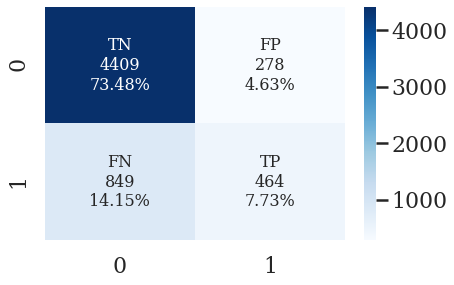

In [14]:
print('Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bc_tr), geometric_mean_score(y_tr, y_pred_bc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bc_val), geometric_mean_score(y_val, y_pred_bc_val)))
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bc_tr, y_pred_bc_val, bc)

Balanced Bagging Classifier Performance:
Balanced training accuracy: 0.96 - Geometric mean 0.00
Balanced validation accuracy: 0.69 - Geometric mean 0.67
Training Accuracy:  0.9441428571428572
Validation Accuracy:  0.7758333333333334
Training F1 Score:  0.8880190930787589
Validation F1 Score:  0.5107311749727174
Training AUC Score:  0.9958517714814478
Validation AUC Score:  0.7631246901421198
Training Recall Score:  0.998926116838488
Validation Recall Score:  0.5346534653465347
Training Precision Score:  0.7992782264993985
Validation Precision Score:  0.48885793871866295
Training Average Precision Score:  0.9829377946438187
Validation Average Precision Score:  0.5164493722987966

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16344
           1       0.80      1.00      0.89      4656

    accuracy                           0.94     21000
   macro avg       0.90      0.96      0.93     21000
weighte

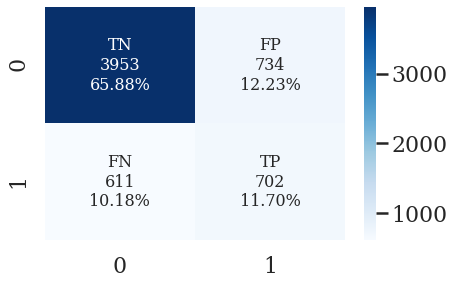

In [15]:
print('Balanced Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bbc_tr), geometric_mean_score(y_val, y_pred_bbc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bbc_val), geometric_mean_score(y_val, y_pred_bbc_val)))
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bbc_tr, y_pred_bbc_val, bbc)

# Undersampling Methods

In [16]:
from imblearn.under_sampling import NearMiss 

In [17]:
# define the undersampling method
undersample = NearMiss(version=1)
counter = Counter(y_tr)
print(counter)

Counter({0: 16344, 1: 4656})


In [18]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_tr_res_nm, y_tr_res_nm = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_nm)
print(counter)

Counter({0: 4656, 1: 4656})


In [19]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from matplotlib import pyplot
from numpy import where

In [20]:
# summarize class distribution
counter = Counter(y_tr)
print(counter)
# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X_tr_res_ncr, y_tr_res_ncr = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_ncr)
print(counter)

Counter({0: 16344, 1: 4656})
Counter({0: 10212, 1: 4656})


In [22]:
from imblearn.under_sampling import OneSidedSelection
counter = Counter(y_tr)
print(counter)
# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X_tr_res_oss, y_tr_res_oss = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_oss)
print(counter)

Counter({0: 16344, 1: 4656})
Counter({0: 13717, 1: 4656})


## Random Oversampling and Undersampling for Imbalanced Classification

In [25]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [28]:
model = DecisionTreeClassifier()
# define resampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X_tr, y_tr, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: nan


In [8]:
##def evaluate_classifier(clf, df_scores, clf_name=None):
    from sklearn.pipeline import Pipeline
    if clf_name is None:
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__
    acc = clf.fit(X_tr3, y_tr).score(X_val3, y_vval)
    y_pred = clf.predict(X_val3)
    bal_acc = balanced_accuracy_score(y_val, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores


# Let's define an empty dataframe to store the results
df_scores = pd.DataFrame()

In [9]:
num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessor_linear = ColumnTransformer(
    [("num-pipe", num_pipe, selector(dtype_include=np.number)),
     ("cat-pipe", cat_pipe, selector(dtype_include=pd.CategoricalDtype))],
    n_jobs=2
)
lr_clf = make_pipeline(
    preprocessor_linear, LogisticRegression(max_iter=1000)
)

NameError: name 'make_pipeline' is not defined

## Tomek Links

In [ ]:
tl = TomekLinks()
X_res_tom, y_res_tom = tl.fit_resample(X_train3, y_tr)
print('Original dataset shape %s' % Counter(y_tr))
print('Resampled dataset shape %s' % Counter(y_res_tom))

# Hyperparamter Tuning

## Logistic Regression with GridSearchCV

Best: 0.527854 using {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Training Accuracy:  0.8203809523809524
Validation Accuracy:  0.8166666666666667
Training F1 Score:  0.4591339260108976
Validation F1 Score:  0.4393476044852192
Training AUC Score:  0.7551636801886586
Validation AUC Score:  0.7500132027284232
Training Recall Score:  0.3438573883161512
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6906816220880069
Validation Precision Score:  0.6640986132511556
Training Average Precision Score:  0.5273690480358884
Validation Average Precision Score:  0.5003345380796673

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16344
           1       0.69      0.34      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
   

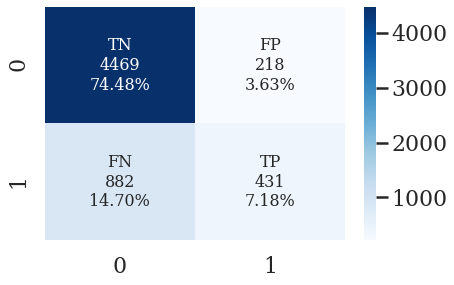

In [32]:
logreg = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1, 10], 
          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
gslog = GridSearchCV(estimator = logreg,
                     param_grid = params,
                     scoring = 'average_precision',
                     cv = 10,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gslog_tr = gslog.predict(X_tr)
y_pred_gslog_val = gslog.predict(X_val)
print("Best: %f using %s" % (gslog.best_score_, gslog.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gslog_tr, y_pred_gslog_val, gslog)


In [ ]:
svc = SVC()
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 1000], 'kernel': ['linear']}, 
          {'C': [0.001, 0.01, 0.1, 1, 10, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.0001]}]
gssvc = GridSearchCV(estimator = svc,
                     param_grid = params, 
                     scoring = 'average_precision',
                     cv = 5,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gssvc_tr = gssvc.predict(X_tr)
y_pred_gssvc_val = gssvc.predict(X_val)
print("Best: %f using %s" % (gssvc.best_score_, gssvc.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gssvc_tr, y_pred_gssvc_val, gssvc)

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors': [1, 4, 8, 12, 16, 20], 
           'leaf_size': [5, 10, 15, 20, 25, 30], 
           'weights': ['uniform', 'distance'],
           'metric': ['euclidean', 'manhattan', 'minkowski']}
gsknn = GridSearchCV(estimator = knn,
                     param_grid = params,
                     scoring = 'average_precision',
                     cv = 5,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gsknn_tr = gsknn.predict(X_tr)
y_pred_gsknn_val = gsknn.predict(X_val)
print("Best: %f using %s" % (gsknn.best_score_, gsknn.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsknn_tr, y_pred_gsknn_val, gsknn)

Best: 0.511668 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 8}

Training Accuracy:  0.826047619047619
Validation Accuracy:  0.817
Training F1 Score:  0.5002052264331646
Validation F1 Score:  0.4607072691552063
Training AUC Score:  0.781021964090777
Validation AUC Score:  0.7601412797563095
Training Recall Score:  0.39261168384879724
Validation Recall Score:  0.3571972581873572
Training Precision Score:  0.6890312853373539
Validation Precision Score:  0.648686030428769
Training Average Precision Score:  0.5600665276232221
Validation Average Precision Score:  0.5054697673528439

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     16344
           1       0.69      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validati

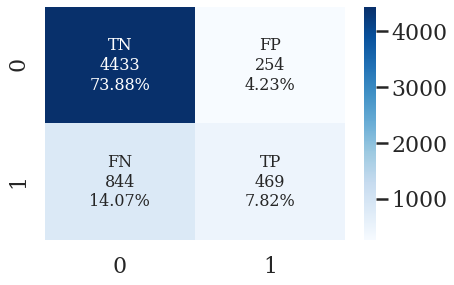

In [33]:
dtc = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8, 10],
          'min_samples_leaf': [2, 4, 6, 8, 10], 
          'min_samples_split': [2, 4, 6, 8, 10]}
gsdtc = GridSearchCV(estimator = dtc,
                     param_grid = params,
                     scoring = 'average_precision',
                     cv = 5,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gsdtc_tr = gsdtc.predict(X_tr)
y_pred_gsdtc_val = gsdtc.predict(X_val)
print("Best: %f using %s" % (gsdtc.best_score_, gsdtc.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsdtc_tr, y_pred_gsdtc_val, gsdtc)

In [ ]:
rfc = RandomForestClassifier()
params = {'n_estimators': [100, 200, 400, 600, 1000],
          'criterion': ['entropy', 'gini'],
          'max_depth': [5, 8, 15, 25, 30],
          'min_samples_split': [2, 5, 10, 15, 100],
          'min_samples_leaf': [1, 2, 5, 10]}
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     scoring = 'average_precision',
                     cv = 5,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gsrfc_tr = gsrfc.predict(X_tr)
y_pred_gsrfc_val = gsrfc.predict(X_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsrfc_tr, y_pred_gsrfc_val, gsrfc)

In [ ]:
gbc = GradientBoostingClassifier()
params = {'n_estimators': [10, 100, 1000],
          'learning_rate': [0.001, 0.01, 0.1],
          'subsample': [0.5, 0.7, 1.0],
          'max_depth': [3, 7, 9]}
gsgbc = GridSearchCV(estimator = gbc,
                     param_grid = params, 
                     n_jobs = -1, 
                     cv = 5, 
                     scoring = 'average_precision').fit(X_tr, y_tr)
y_pred_gsgbc_tr = gsgbc.predict(X_tr)
y_pred_gsgbc_val = gsgbc.predict(X_val)
print("Best: %f using %s" % (gsgbc.best_score_, gsgbc.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsgbc_tr, y_pred_gsgbc_val, gsrfc)

In [ ]:
xgb = XGBClassifier()
params = {'n_estimators': [50, 100, 150, 200], 
          'max_depth': [3, 5, 7, 10], 
          'min_child_weight': [2, 3, 4, 5]}
gsxgb = GridSearchCV(estimator = xgb,
                     param_grid = params,
                     scoring = 'average_precision',
                     cv = 5,
                     n_jobs = -1).fit(X_tr, y_tr)
y_pred_gsxgb_tr = gsxgb.predict(X_tr)
y_pred_gsxgb_val = gsxgb.predict(X_val)
print("Best: %f using %s" % (gsxgb.best_score_, gsxgb.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsxgb_tr, y_pred_gsxgb_val, gsxgb)